• DOMAIN: Telecom
• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.
• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents
• PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn. 
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention.
• Steps to the project: [ Total score: 60 points ]
1. Import and warehouse data: [ Score: 5 point ]
• Import all the given datasets. Explore shape and size. 
• Merge all datasets onto one and explore final shape and size.
2. Data cleansing: [ Score: 10 point ]
• Missing value treatment
• Convert categorical attributes to continuous using relevant functional knowledge
• Drop attribute/s if required using relevant functional knowledge
• Automate all the above steps
3. Data analysis & visualisation: [ Score: 10 point ]
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
4. Data pre-processing: [ Score: 5 point ]
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.
• Check if the train and test data have similar statistical characteristics when compared with original data.
5. Model training, testing and tuning: [ Score: 25 point ]
• Train and test all ensemble models taught in the learning module.
• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
• Display the classification accuracies for train and test data.
• Apply all the possible tuning techniques to train the best model for the given data. 
• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting this model. 
• Pickle the selected model for future use.
6. Conclusion and improvisation: [ Score: 5 point ]
• Write your conclusion on the results.
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
telecom operator to perform a better data analysis in future.

In [1]:
#import libabries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
data = pd.read_csv('TelcomCustomer-Churn.csv')

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.shape

(7043, 21)

In [5]:
data.size

147903

# Data cleansing

In [6]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {data.shape}")
totalrows=data.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (7043, 21)
 Total number of rows in the dataset =  7043


In [7]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
# Checking Null colunms
data_nullcols = data.isnull().sum()
data_nullcols

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Check columns types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.mean()

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [12]:
data.describe().transpose()

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [13]:
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

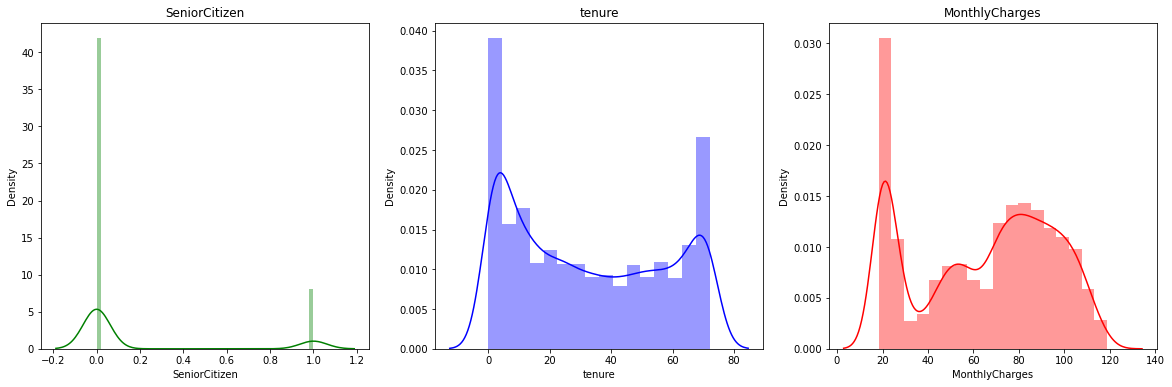

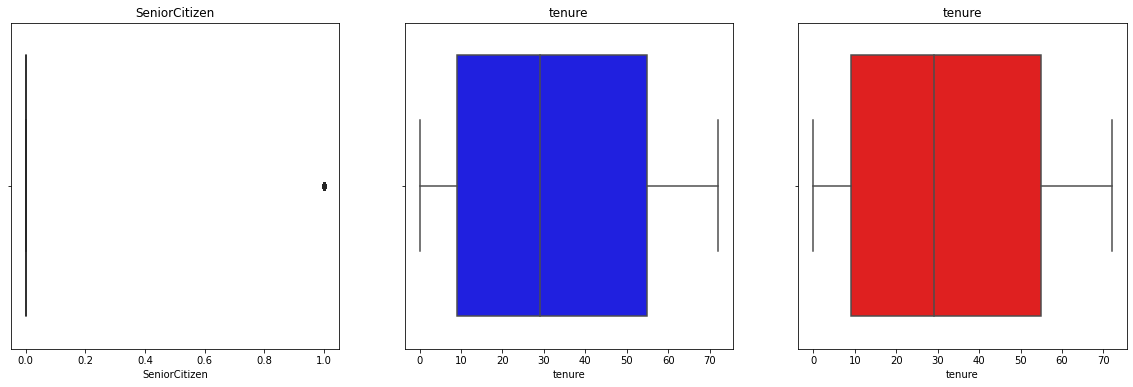

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('SeniorCitizen')
sns.distplot(data['SeniorCitizen'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('tenure')
sns.distplot(data['tenure'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('MonthlyCharges')
sns.distplot(data['MonthlyCharges'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('SeniorCitizen')
sns.boxplot(data['SeniorCitizen'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('tenure')
sns.boxplot(data['tenure'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('tenure')
sns.boxplot(data['tenure'],orient='vertical',color='red')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


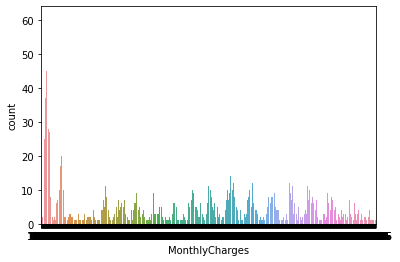

In [15]:
sns.countplot(data['MonthlyCharges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


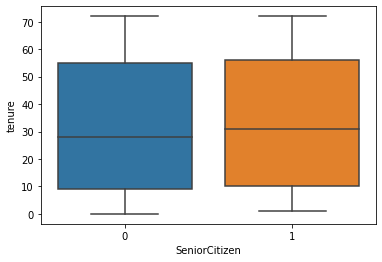

In [16]:
sns.boxplot(data['SeniorCitizen'],data['tenure']);

# BIVARIATE

In [17]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = data.corr()
corr.style

In [18]:
corr.dtypes

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
dtype: object

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

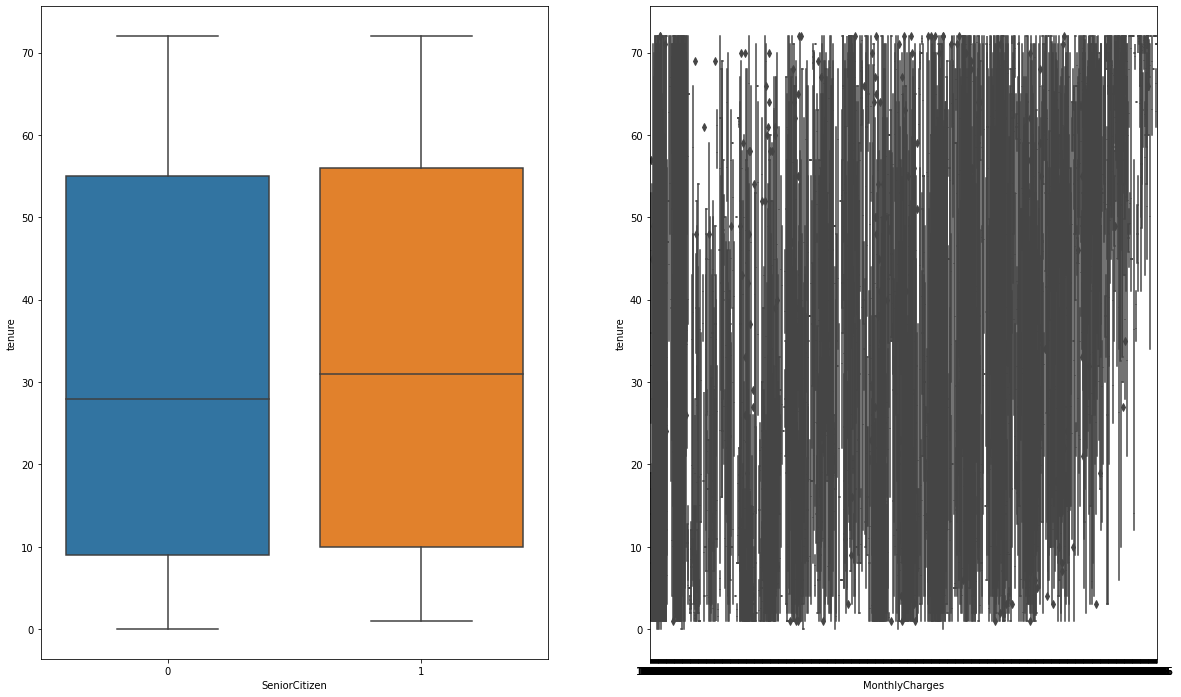

In [19]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = 'SeniorCitizen', y = 'tenure', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'MonthlyCharges', y = 'tenure', data = data)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

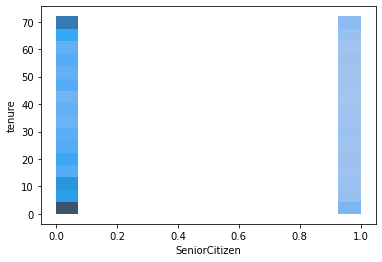

In [20]:
sns.histplot(x = 'SeniorCitizen', y = 'tenure', data = data)

#  Multivariate 

In [21]:
sns.pairplot(data)

In [22]:
sns.scatterplot(data['SeniorCitizen'], data['tenure'])  # Plots the scatter plot using two variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


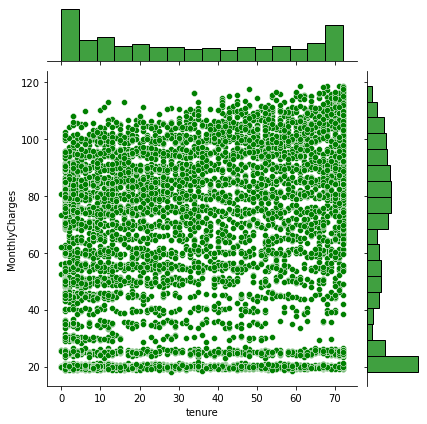

In [23]:
sns.jointplot(data['tenure'],data['MonthlyCharges'],color='green');

<AxesSubplot:>

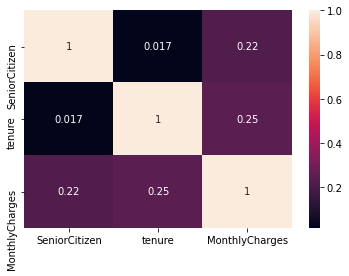

In [24]:
sns.heatmap(data.corr(), annot=True)  # plot the correlation coefficients as a heatmap

Lets convert the columns with an 'object' datatype into categorical variables


In [25]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

Get value counts for every column

In [26]:
print(data.gender.value_counts())
print(data.Partner.value_counts())
print(data.Dependents.value_counts())
print(data.PhoneService.value_counts())
print(data.MultipleLines.value_counts())
print(data.InternetService.value_counts())
print(data.OnlineSecurity.value_counts())
print(data.OnlineBackup.value_counts())
print(data.DeviceProtection.value_counts())
print(data.TechSupport.value_counts())
print(data.StreamingTV.value_counts())
print(data.StreamingMovies.value_counts())
print(data.Contract.value_counts())
print(data.PaperlessBilling.value_counts())
print(data.PaymentMethod.value_counts())
print(data.MonthlyCharges.value_counts())
print(data.TotalCharges.value_counts())
print(data.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

# Hence, data type for TotalCharges is int


In [31]:
replaceStruct = {
                 "InternetService":{"Fiber optic": 1, "DSL":2,"No":3},
                 "Contract":{"Month-to-month": 1, "One year": 2,"Two year":3},
                 "PaymentMethod":{"Electronic check": 1, "Mailed check": 2,"Bank transfer (automatic)":3,"Credit card (automatic)":4},
                  "Churn": {"No": 1, "Yes": 2}  }
oneHotCols=["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]

In [32]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)

customerID  SeniorCitizen  tenure  InternetService  Contract  \
0  7590-VHVEG              0       1                2         1   
1  5575-GNVDE              0      34                2         2   
2  3668-QPYBK              0       2                2         1   
3  7795-CFOCW              0      45                2         2   
4  9237-HQITU              0       2                1         1   
5  9305-CDSKC              0       8                1         1   
6  1452-KIOVK              0      22                1         1   
7  6713-OKOMC              0      10                2         1   
8  7892-POOKP              0      28                1         1   
9  6388-TABGU              0      62                2         2   

   PaymentMethod  MonthlyCharges TotalCharges  Churn  gender_Female  ...  \
0              1           29.85        29.85      1              1  ...   
1              2           56.95       1889.5      1              0  ...   
2              2           53.85       108.15      2              0  ...   
3              3           42.30      1840.75      1              0  ...   
4              1           70.70       151.65      2              1  ...   
5              1           99.65        820.5      2              1  ...   
6              4           89.10       1949.4      1              0  ...   
7              2           29.75        301.9      1              1  ...   
8              1          104.80      3046.05      2              1  ...   
9              3           56.15      3487.95      1              0  ...   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   
5                                0                0               0   
6                                0                0               0   
7                                0                0               1   
8                                0                1               0   
9                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   
3                                0                0                   1   
4                                0                0                   1   
5                                0                1                   0   
6                                0                1                   1   
7                                0                0                   1   
8                                0                1                   0   
9                                0                0                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   
5                                    0                    1   
6                                    0                    0   
7                                    0                    0   
8                                    0                    1   
9                                    0                    0   

   PaperlessBilling_No  PaperlessBilling_Yes  
0                    0                     1  
1                    1          

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   customerID                            7043 non-null   category
 1   SeniorCitizen                         7043 non-null   int64   
 2   tenure                                7043 non-null   int64   
 3   InternetService                       7043 non-null   int64   
 4   Contract                              7043 non-null   int64   
 5   PaymentMethod                         7043 non-null   int64   
 6   MonthlyCharges                        7043 non-null   float64 
 7   TotalCharges                          7043 non-null   category
 8   Churn                                 7043 non-null   int64   
 9   gender_Female                         7043 non-null   uint8   
 10  gender_Male                           7043 non-null   uint8   
 11  Part

# SPLIT DATA

In [34]:
X = data.drop(["customerID","Churn","TotalCharges"],axis=1)
y = data['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=30, random_state=1)

# Build Decision Tree Model


We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.


In [36]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

# Scoring our Decision Tree

In [37]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9970055611008127
0.8


Hence, this decision tree model is 'overfitted

# Visualizing the Decision Tree

Using plot_tree method from sklearn.tree

In [38]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
data_Tree_File = open('data_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=data_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
data_Tree_File.close()

In [ ]:
tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)

In [39]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng data_tree.dot -o data_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("data_tree.png"))

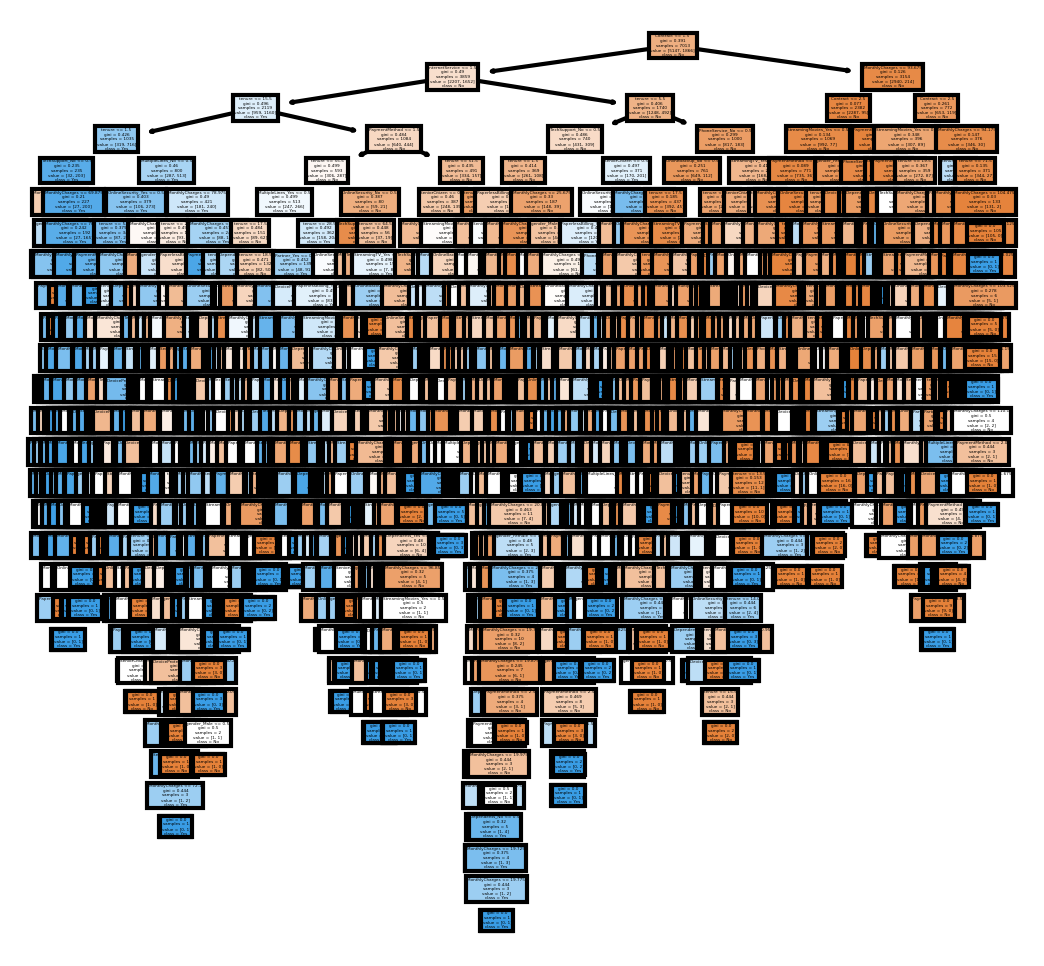

In [40]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

# Reducing over fitting (Regularization)

In [41]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7905318693854271
0.9333333333333333


In [42]:
train_char_label = ['No', 'Yes']
data_Tree_FileR = open('data_treeR.dot','w')
dot_data = export_graphviz(dTreeR, out_file=data_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
data_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng data_treeR.dot -o data_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("data_treeR.png"))

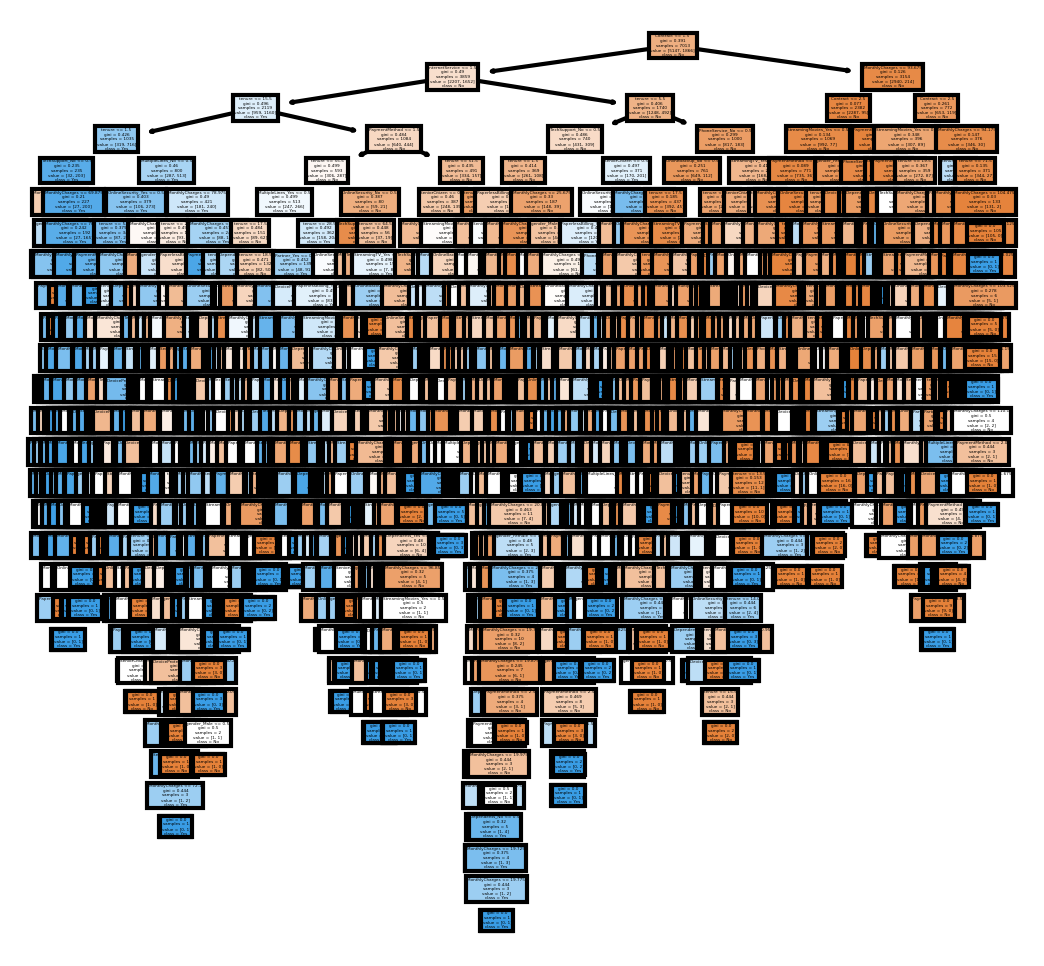

In [43]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [44]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                           Imp
SeniorCitizen                         0.000000
tenure                                0.176537
InternetService                       0.180214
Contract                              0.622753
PaymentMethod                         0.000000
MonthlyCharges                        0.020497
gender_Female                         0.000000
gender_Male                           0.000000
Partner_No                            0.000000
Partner_Yes                           0.000000
Dependents_No                         0.000000
Dependents_Yes                        0.000000
PhoneService_No                       0.000000
PhoneService_Yes                      0.000000
MultipleLines_No                      0.000000
MultipleLines_No phone service        0.000000
MultipleLines_Yes                     0.000000
OnlineSecurity_No                     0.000000
OnlineSecurity_No internet service    0.000000
OnlineSecurity_Yes                    0.000000
OnlineBackup_

Hence, we can observe that tenure, InternetService and Contract play important role for our final prediction

# Confusion matrix

0.9333333333333333


<AxesSubplot:>

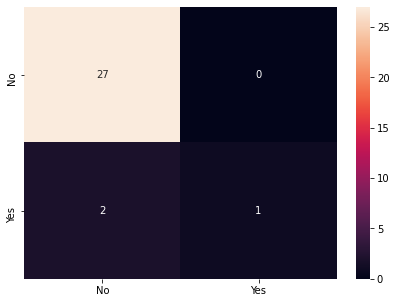

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test, y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8333333333333334


<AxesSubplot:>

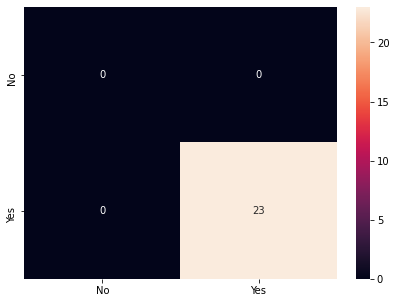

In [47]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8666666666666667


<AxesSubplot:>

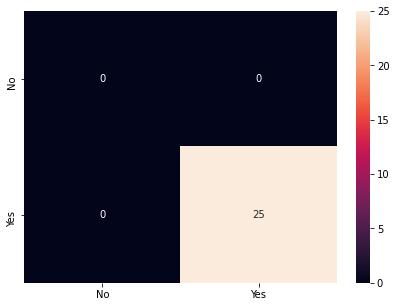

In [49]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.9


<AxesSubplot:>

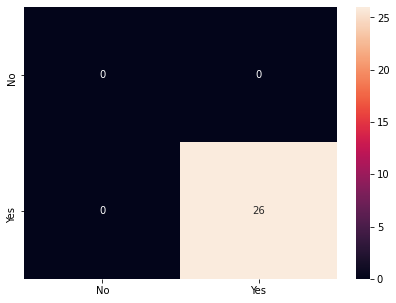

In [51]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9


<AxesSubplot:>

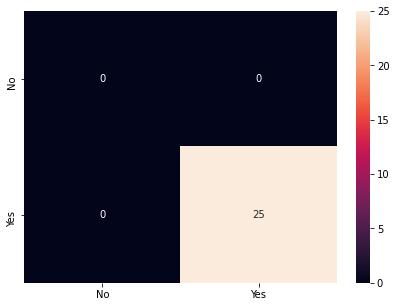

In [53]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# conclusion

Accuracy on training set for decision tree:0.9970055611008127
Accuracy on training set for regularised decision tree:0.7979176526265973
Accuracy on training set for decision tree with bagging: 0.8333333333333334
Accuracy on training set for decision tree with adaptive boosting: 0.8666666666666667
Accuracy on training set for decision tree with gradient boosting: 0.9
Accuracy on training set for random forest classifier: 0.9

Hence, we can conclude that the decision tree model with adaptive boosting gives us the best accuracy.


Also, observed that bagging classifiers in general benefit from having complex individual models and boosting classifiers in general benefit from having simple models